# **Laboratorijska vježba 4**: Regresijska analiza


> Analiza podataka četvrti je korak u uobičajenom slijedu koraka koje provodi podatkovni znanstvenik. Ova faza je ključna faza u znanosti o podacima, a uključuje izvođenje različitih tehnika za analizu podataka. U sklopu ovog koraka provodi se eksploratorna/potvrdna, prediktivna, regresijska ili kvalitativna analiza. 

> U ovoj laboratorijskoj vježbi upoznat ćemo se s jednim aspektom analize podataka koji se naziva **regresijska analiza**. U tu svrhu koristit ćemo biblioteke statsmodels i SciPy koje olakšavaju regresijsku analizu skupova podataka. 
---

# **Regresijska analiza**

Regresijska analiza odnosi se na skup statističkih metoda za procjenu odnosa između zavisne (izlazne) varijable i jedne ili više nezavisnih varijabli (koje se često nazivaju prediktori ili značajke). Najčešći oblik regresijske analize jest linearna regresija, u kojoj se pronalazi linearna kombinacija koja najviše odgovara podacima prema zadanom matematičkom kriteriju.

Regresijska analiza prvenstveno se koristi u tri konceptualno različite svrhe:
*  **Predviđanje** - u ovom kontekstu, regresija se promatra kao algoritam strojnog učenja. Cilj je pronaći prilagođeni model za predviđanje zavisne varijable na temelju značajki. 

*  **Deskriptivna analiza podataka** - u ovom kontekstu, regresija se koristi za opisivanje odnosa između zavisne i nezavisnih varijabli.

* **Kauzalno modeliranje** - u ovom kontekstu, regresija služi za razumijevanje kako se zavisna varijabla mijenja kad se mijenjaju nezavisne varijable.

U ovoj laboratorijskoj vježbi, primarno ćemo se posvetiti regresijskoj analizi kada se ona koristi za deskriptivnu analizu podataka. 

## **Regresijski model**

U praksi, analitičari prvo odabiru oblik regresijskog modela koji bi željeli definirati, a zatim koriste proizvoljnu metodu za procjenu parametara tog modela. Regresijski modeli uključuju sljedeće komponente:

*  Nepoznate parametre ($\beta$)
*  Nezavisne varijable (značajke) koje opisuju podatke ($X_i$)
*  Zavisnu varijablu koja se nastoji modelirati/predvidjeti ($Y_i$)
*  Pogreške koje se ne promatraju izravno u podacima ($e_i$)

Regresijski model se može formalno izraziti kao:

$$Y_i = f(X_i,\beta) + e_i .$$

Cilj analitičara jest definirati funkciju $f(X_i,\beta)$ koja najviše odgovara podacima. Pri tome, potrebno je poznavati oblik funkcije $f$. Oblik ove funkcije određuje i vrstu regresijskog modela. Ponekad se oblik ove funkcije zasniva na prethodnom znanju o odnosu između $Y_i$ i $X_i$. Ako takvo znanje nije dostupno, mogu se koristiti poznati oblici.

Nakon odabira preferiranog modela regresije, različiti oblici regresijske analize pružaju alate za procjenu parametara $\beta$. Jedna od poznatih takvih metoda jest metoda najmanjih kvadrata koja nalazi vrijednost $\beta$ koja minimiza zbroj kvadrata pogrešaka $\sum_i (Y_i-f(X_i,\beta))^2$. Metode za procjenu parametara u konačnici daju procjenu $\beta$, koja se označava kao $\hat{\beta}$. Koristeći ovu procjenu, analitičari mogu koristiti prilagođenu vrijednost $\hat{Y_i}$ za predviđanje, deskriptivnu analizu podataka ili kauzalno modeliranje.    

### **Jednostavna linearna regresija**

Model linearne regresije pretpostavlja da se zavisna varijabla $Y_i$ može modelirati kao **linearna kombinacija parametara**. Bitno je napomenuti da je ovdje riječ samo o linearnoj kombinaciji parametara, dok nezavisne varijable ($X_i$) ne moraju biti linearne (primjerice, mogu imati eksponent $\neq 1$). Kod **jednostavne linearne regresije**, za modeliranje $n$ točaka u skupu podataka postoji jedna nezavisna varijabla ($x_i$) i 2 parametra ($\beta_o$ i $\beta_1$):

$$y_i = \beta_0 + \beta_1 \cdot x_i + e_i, \qquad i=1,\dots,n.$$

S obzirom na dani slučajni uzorak iz populacije, cilj je procijeniti parametre $\beta_0$ i $\beta_1$ populacije te dobiti model linearne regresije uzorka:

$$ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1} \cdot x_i .$$

Rezidual, $e_i=y_i - \hat{y_i}$ predstavlja razliku između vrijednosti zavisne varijable predviđene modelom ($\hat{y_i}$) i prave vrijednosti zavisne varijable ($y_i$). Jedna od poznatijih metoda procjene parametara jest **metoda običnih najmanjih kvadrata** (engl. *ordinary least squares*). Ova metoda dobiva procjene parametara koje minimiziraju zbroj kvadrata reziduala, SSR:

$$ \text{SSR} = \sum_{i=1}^n e_i^2 .$$
 
Minimizacija ove funkcije rezultira skupom linearnih jednadžbi koje se rješavaju da bi se dobile procjene parametara $\hat{\beta_0}$ i $\hat{\beta_1}$. U slučaju jednostavne linearne regresije, formula za ove paramere jest:

$$ \hat{\beta_1} = \frac{\sum (x_i-\bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} , $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1} \cdot \bar{x} , $$

gdje je $\bar{x}$ prosječna vrijednost $x$ vrijednosti, a $\bar{y}$ prosječna vrijednost $y$ vrijednosti u uzorku. 


S obzirom na to da model jednostavne linearne regresije opisuje linearnu vezu između dviju varijabli ($y$ i $x$) za $i$ točaka ($i=1,\dots,n$), može se grafički predstaviti pravcem u dvodimenzionalnom koordinatnom sustavu. Pri tome, vrijednost parametra $\beta_0$ predstavlja odsječak pravca na os y, a vrijednost parametra $\beta_1$ nagib pravca. Pravac koji grafički predstavlja model jednostavne linearne regresije (koja koristi metodu najmanjih kvadrata za procjenu parametara) još se naziva i ***best-fit*** pravac. 

### **Generalna višestruka linearna regresija**

Kod višestruke linearne regresije postoji nekoliko nezavisnih varijabili ili funkcija nezavisnih varijabli. Za $p$ nezavisnih varijabli, oblik regresije postaje:

$$ y_i = \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \epsilon_i , $$

gdje $x_{ij}$ predstavlja $i$-to promatranje $j$-te nezavisne varijable u skupu podataka. Ako prva nezavisna varijabla poprimi vrijednost $1$ za sve $i$, odnosno $x_{i1}=1$, onda se $\beta_{1}$ naziva regresijskim presjekom (engl. *regression intercept*). Procjene parametara dobivaju se rješavanjem $p$ normalnih jednadžbi. Pomoću matrične notacije, ove jednadžbe se mogu zapisati kao:

$$(X^TX)\hat{\beta} = X^T Y . $$ 

Rješenje ove jednadžbe je vektor 

$$ \hat{\beta} = (X^TX)^{-1} X^TY . $$


## **Regresija za deskriptivnu analizu podataka**

Jedna od najčešćih primjena regresije pri njezinoj upotrebi za deskriptivnu analizu podataka jest usporedba prosječnih vrijednosti izlaznih varijabli za različite vrijednosti nezavisnih varijabli.

Zamislimo, primjerice, problem modeliranja plaća radnika na temelju informacije jesu li završili fakultet. Neka je $y_i \in [0,5000]$ zavisna varijabla koja predstavlja plaću radnika u €, a $x_i \in \{0,1\}$ nezavisna varijabla koja predstavlja informaciju je li radnik završio fakultet ili ne. Možemo modelirati ove varijable jednostavnom linearnom regresijom:

$$ y_i = \beta_0 + \beta_1 \cdot x_i + e_i . $$ 

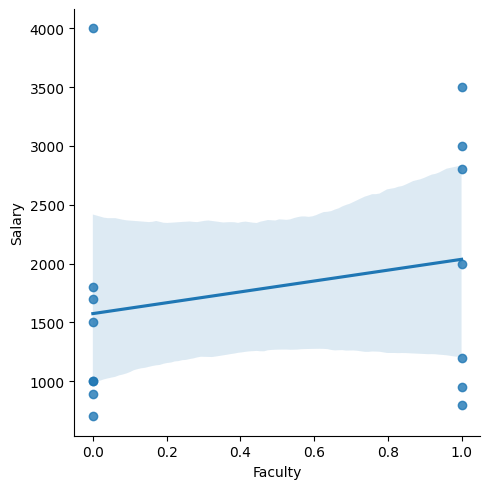

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.DataFrame({'Salary': [3500,1000,2000,1200,1800,800,1500,3000,950,700,890,1700,4000,2800,1000], 
                     'Faculty': [1,0,1,1,0,1,0,1,1,0,0,0,0,1,0]})

sns.lmplot(x = 'Faculty',
           y = 'Salary',
           data = data)

Prema gore navedenim formulama, možemo procijeniti vrijednosti parametara $\beta_0$ i $\beta_1$:

$$ \hat{\beta_1} = \frac{\sum (x_i-\bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} , $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1} \cdot \bar{x} . $$

In [2]:
nominator = 0
denominator = 0

x_mean = data['Faculty'].mean()
y_mean = data['Salary'].mean()

for i in range(len(data)):
  nominator += (data.loc[i]['Faculty'] - x_mean) * (data.loc[i]['Salary'] - y_mean)
  denominator += (data.loc[i]['Faculty'] - x_mean)**2

beta1 = nominator/denominator
beta0 = y_mean - beta1 * x_mean
print("{:.2f}, {:.2f}".format(beta1, beta0))


461.96, 1573.75


Osim što predstavljaju koeficijente pravca, vrijednosti parametara $\hat{\beta_1}$ i $\hat{\beta_0}$ olakšavaju usporedbu prosječnih vrijednosti izlaznih varijabli za različite vrijednosti nezavisne varijable. Prema modelu jednostavne linearne regresije, može se zaključiti da $\beta_0$ predstavlja prosječnu vrijednost zavisne varijable ($y_i$) kada je vrijednost nezavisne varijable jednaka 0 ($x_i=0$). Drugim riječima, $\beta_0=1573.75$ predstavlja prosječnu plaću radnika koji nisu završili fakultet. Nadalje, $\beta_1=461.96$ predstavlja razliku u prosječnim vrijednostima izlaznih varijabli za $x_i=1$ i $x_1=0$. Prema tome, radnici koji su završili fakultet imaju prosječni rezultat testa $\beta_0 + \beta_1 = 1573.75 + 461.96 = 2035.71$.

Do ovih zaključaka mogli smo doći i jednostavnije - računanjem prosječnih vrijednosti za varijablu $y$ posebno za $x_i=0$ te posebno za $x_i=1$.

In [3]:
y_faculty_mean = data.query('Faculty == 1')['Salary'].mean()
y_non_faculty_mean = data.query('Faculty == 0')['Salary'].mean()

print("{:.2f}, {:.2f}".format(y_non_faculty_mean, y_faculty_mean))

1573.75, 2035.71


Ipak, u nastavku ćemo pojasniti pogodnost regresijske analize za uspoređivanje prosječnih vrijednosti. Promotrimo ponovno problem modeliranja plaća radnika. Ovaj put neka nezavisna varijabla predstavlja radnikov rezultat na IQ testu ($x_i \in [70,140]$), dok je model ponovno jednostavna linearna regresija. Bitno je naglasiti da je nezavisna varijabla sada kontinuirana, dok je prethodno bila diskretna.

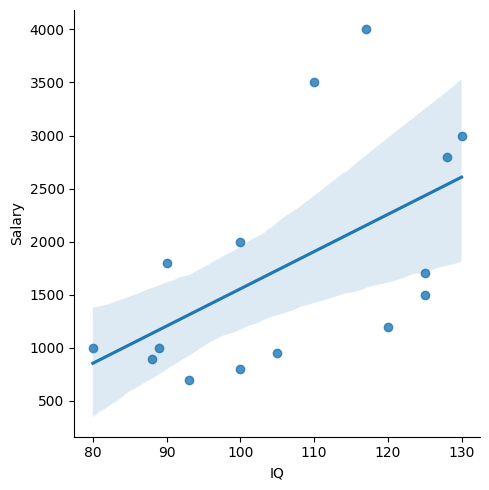

In [4]:
data = pd.DataFrame({'IQ': [110, 80, 100, 120, 90, 100, 125, 130, 105, 93, 88, 125, 117, 128, 89], 
                     'Salary': [3500,1000,2000,1200,1800,800,1500,3000,950,700,890,1700,4000,2800,1000]})

sns.lmplot(x = 'IQ',
           y = 'Salary',
           data = data)

Ponovno možemo procijeniti vrijednosti parametara $\beta_0$ i $\beta_1$:

In [5]:
nominator = 0
denominator = 0

x_mean = data['IQ'].mean()
y_mean = data['Salary'].mean()

for i in range(len(data)):
  nominator += (data.loc[i]['IQ'] - x_mean) * (data.loc[i]['Salary'] - y_mean)
  denominator += (data.loc[i]['IQ'] - x_mean)**2

beta1 = nominator/denominator
beta0 = y_mean - beta1 * x_mean
print("{:.2f}, {:.2f}".format(beta1, beta0))

35.08, -1952.21


Prema tome, model jednostavne linearne regresije izgleda ovako:

$$ y_i = -1952.21 + 35.08x_i + e_i . $$

Ubacivanjem različitih vrijednosti za varijable $x$ i $y$ možemo dobiti procjenu druge varijable. Primjerice, hipotetska plaća radnika s IQ=0 jest: $y_i = -1952.21 + 35.08 \cdot 0 = -1952.21$. Nadalje, radnici s IQ=100 u prosjeku zarađuju $y_i = -1952.21 + 35.08 \cdot 100 = 1555.79$. Prema ovom modelu, radnici s IQ=200 bi zarađivali $y_i = -1952.21  + 35.08 \cdot 200 = 5063.79$.

U ovom slučaju (kada su obje varijable kontinuirane), procijenjena vrijednost parametra$\beta_1$ ima nešto drugačije značenje. Vrijednost parametra $\beta_0$ ponovno predstavlja prosječnu vrijednost zavisne varijable ($y_i$) kada je vrijednost nezavisne varijable jednaka 0 ($x_i=0$). Međutim, vrijednost parametra $\beta_1$ predstavlja razliku u procijenjenim prosječnim vrijednostima izlaznih varijabli za točke čiji se $x_i$ razlikuje za 1 (jer se rezultati testa iskazuju prirodnim brojem).

Promotrimo ponovno problem modeliranja plaća radnika. Ovaj put dodajmo još jednu nezavisnu varijablu. Neka varijabla $x_{i2}$ predstavlja informaciju je li radnik završio fakultet ($0$ ili $1$), a varijabla $x_{i3}$ njegov rezultat na IQ testu ($x_{i3} \in [70, 140]$). Varijabla $x_{i1}$ je konstantna ($=1$) za sve točke, kako bi se zadovoljio oblik generalne višestruke linearne regresije:

$$ y_i = \beta_0 + \beta_1 \cdot x_{i2} + \beta_2 \cdot x_{i3} + ϵ_i . $$

<Axes: xlabel='Faculty', ylabel='IQ'>

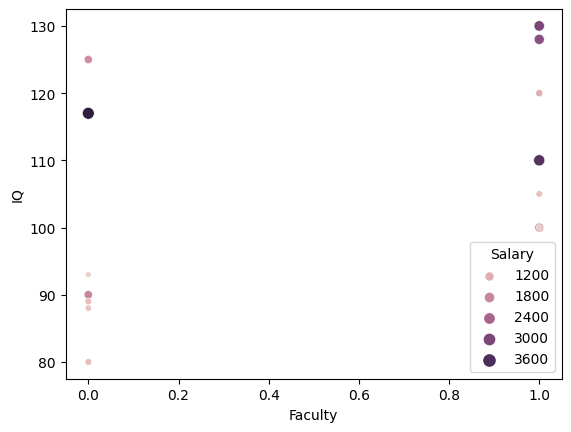

In [6]:
data = pd.DataFrame({'Reg_intercept': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                     'Faculty': [1,0,1,1,0,1,0,1,1,0,0,0,0,1,0], 
                     'IQ': [110, 80, 100, 120, 90, 100, 125, 130, 105, 93, 88, 125, 117, 128, 89],
                     'Salary': [3500,1000,2000,1200,1800,800,1500,3000,950,700,890,1700,4000,2800,1000]})

sns.scatterplot(data=data, x='Faculty', y='IQ', size='Salary', hue='Salary')

Kao što je gore navedeno, procjene parametara dobivaju se rješavanjem matrične jednadžbe:

$$(X^TX)\hat{\beta} = X^T Y . $$ 

Rješenje ove jednadžbe je vektor 

$$ \hat{\beta} = (X^TX)^{-1} X^TY . $$


In [7]:
from numpy.linalg import inv, det

X = data[['Reg_intercept','Faculty', 'IQ']].to_numpy()
Y = data['Salary'].to_numpy()
X_t = np.transpose(X)
Beta = np.matmul(np.matmul(inv(np.matmul(X_t, X)), X_t), Y)
Beta




array([-1927.15290663,    31.24601343,    34.70535719])

Prema tome, model generalne višestruke linearne regresije izgleda ovako:

$$ y_i = -1927.15 + 31.25x_{i2} + 34.71x_{i3} + e_i . $$

Ubacivanjem vrijednosti nezavisnih varijabli u dobiveni model, možemo uspoređivati prosječne vrijednosti izlazne varijable. Primjerice, radnici s IQ=120 koji su završili fakultet u prosjeku mogu očekivati plaću od: $y_i = -1927.15 + 31.25 \cdot 1 + 34.71 \cdot 120 = 2269.3$€.

### **Interakcijski članovi u regresijskom modelu**

U modelima jednostavne, odnosno generalne višestruke linearne regresije, izlazna varijabla predstavlja linearnu kombinaciju nezavisnih varijabli. Međutim, moguće je da u takvoj kombinaciji propuštamo još neka međudjelovanja nezavisnih varijabli koja utječu na vrijednost izlazne varijable. Jednostavna linearna kombinacija ne obuhvaća interakcije između varijabli jer pretpostavlja njihovu nezavisnost, što nije uvijek slučaj. Primjerice, u razmatranom problemu možemo naslutiti da su varijable $x_{i2}$ i $x_{i3}$ prilično zavisne, odnosno da radnici koji završe fakultet imaju viši IQ. U ovo se možemo uvjeriti promatranjem dijagrama raspršenosti i korelacije između varijabli. 

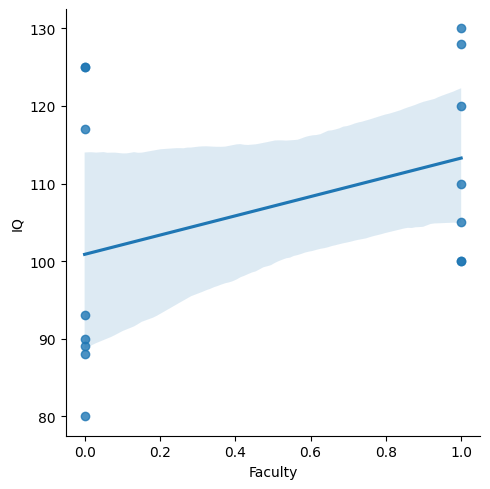

In [8]:
sns.lmplot(x = 'Faculty',
           y = 'IQ',
           data = data)

In [9]:
data.corr()

,Reg_intercept,Faculty,IQ,Salary
Reg_intercept,NaN,NaN,NaN,NaN
Faculty,NaN,1.000000,0.384214,0.225208
IQ,NaN,0.384214,1.000000,0.552360
Salary,NaN,0.225208,0.552360,1.000000


U model regresije moguće je uvrstiti član interakcije, čiji učinak postoji kada se učinak nezavisne na zavisnu varijablu mijenja ovisno o vrijednostima drugih nezavisnih varijabli. Promotrimo ponovno problem modeliranja plaća radnika. Ovaj put u model regresije dodajmo interakcijski član $x_{i2}x_{i3}$ koji predstavlja interakciju između varijabli $x_{i2}$ i $x_{i3}$.

Prema tome, model linearne regresije izgleda ovako:

$$ y_i = \beta_0 + \beta_1 \cdot x_{i2} + \beta_2 \cdot x_{i3} + \beta_3 \cdot x_{i2}x_{i3}+ ϵ_i . $$

In [10]:
data = pd.DataFrame({'Reg_intercept': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                     'Faculty': [1,0,1,1,0,1,0,1,1,0,0,0,0,1,0], 
                     'IQ': [110, 80, 100, 120, 90, 100, 125, 130, 105, 93, 88, 125, 117, 128, 89],
                     'Salary': [3500,1000,2000,1200,1800,800,1500,3000,950,700,890,1700,4000,2800,1000]})

data['Faculty_IQ'] = data['Faculty'] * data['IQ']

data

,Reg_intercept,Faculty,IQ,Salary,Faculty_IQ
0,1,1,110,3500,110
1,1,0,80,1000,0
2,1,1,100,2000,100
3,1,1,120,1200,120
4,1,0,90,1800,0
5,1,1,100,800,100
6,1,0,125,1500,0
7,1,1,130,3000,130
8,1,1,105,950,105
9,1,0,93,700,0


In [11]:
X = data[['Reg_intercept','Faculty', 'IQ', 'Faculty_IQ']].to_numpy()
Y = data['Salary'].to_numpy()
X_t = np.transpose(X)
Beta = np.matmul(np.matmul(inv(np.matmul(X_t, X)), X_t), Y)
Beta

array([-1538.35792277, -1410.23321313,    30.85113182,    13.14652007])

Prema tome, model višestruke linearne regresije izgleda ovako:

$$ y_i = -1538.36 -1410.23x_{i2} + 30.85x_{i3} + 13.15x_{i2}x_{i3} + e_i . $$

Ubacivanjem vrijednosti nezavisnih varijabli i interakcijskog člana u dobiveni model, možemo uspoređivati prosječne vrijednosti izlazne varijable. Primjerice, radnici s IQ=120 koji su završili fakultet u prosjeku mogu očekivati plaću od: $y_i = -1538.36 -1410.23\cdot1 + 30.85\cdot120 + 13.15\cdot1\cdot120 = 2331.41$€. 

Ova je plaća oko 60€ veća od prethodno modelirane plaće na temelju istih vrijednosti nezavisnih varijabli $x_{i2}$ i $x_{i3}$, što je rezultat uključivanja interakcijskog člana u model regresije.  

## **Kvantificiranje nesigurnosti**

Prema prikazanom postupku, moguće je zaključiti kako analitičar proizvoljno može dodavati nove članove i varijable u model regresije. Njihovo dodavanje obično je vođeno intuicijom da dodane varijable imaju utjecaj na izlaznu varijablu u stvarnosti. No, nakon nekoliko koraka dodavanja ili uklanjanja članova iz modela regresije, potrebno je odrediti koji dobiveni model je najprikladniji za problem koji opisuje. Stoga je potrebno na neki način evaluirati učinkovitost svakog modela te odabrati najučinkovitiji.

Nakon što je model regresije konstruiran, potrebno je utvrditi prikladnost (engl. *goodness of fit*) modela i statističku značajnost procijenjenih parametara. Uobičajene provjere uključuju testove $R^2$, analizu uzorka reziduala i testiranje hipoteza. Statistička značajnost može se provjeriti F-testom ukupne prikladnosti, nakon čega slijede t-testovi pojedinačnih parametara.


### **Reziduali i $R^2$**

Za $i$-tu točku u skupu podataka, rezidual predstavlja razliku stvarne i procijenjene vrijednosti izlazne varijable za tu točku:

$$ e_i = y_i - X_i \hat{\beta} = y_i - \hat{y}_i. $$ 

Ako je razlika negativna, znači da je procijenjena vrijednost prevelika, a ako je rezidual pozitivan, to znači da je procijenjena vrijednost premala. Nadalje, za prosječnu vrijednost reziduala vrijedi da je jednaka 0. Ovaj rezultat proizlazi iz minimizacije reziduala metodom najmanjih kvadrata. S druge strane, **varijanca reziduala predstavlja zbroj kvadrata reziduala, a još se naziva "neobjašnjivom varijancom"**. Odnosi se na nasumične fluktuacije oko regresijske linije koje se prikazuju kao varijacije. 

Udio varijance koji se može objasniti modelom izražava se kao koeficijent odlučnosti ili determinacije (engl. *coefficient of determination*): 

$$ R^2 = 1 - \frac{\hat{\sigma}^2}{s_y^2} , $$

gdje je $\hat{\sigma}^2 = \sum (y_i - \hat{y}_i)^2$ neobjašnjiva varijanca, a $s_y^2 = \sum (y_i - \bar{y})^2$ ukupna varijanca. Vrijednost $R^2$ leži u intervalu $[0,1]$. 

Koeficijent odlučnosti daje informacije o prikladnosti modela. Ne treba ga pomiješati s korelacijom. Koeficijent korelacije objašnjava snagu veze između zavisne i nezavisne varijable, dok koeficijent odlučnosti objašnjava koji udio varijance zavisne varijable je objašnjen vezom između zavisne i nezavisne varijable. U kontekstu regresije, koeficijent odlučnosti predstavlja mjerilo koliko dobro se regresijska linija približava stvarnim podacima. Primjerice, ako je $R^2=1$, to znači da je sva varijanca za zavisnu varijablu objašnjena nezavisnim varijablama, odnosno da regresijska linija prolazi kroz sve točke. S druge strane, ako je $R^2=0$, nijedna varijacija zavisne varijable nije objašnjena nezavisnim varijablama, a regresijska linija zapravo nalikuje ravnoj liniji (pravac s nagibom 0) koja prolazi kroz prosječnu vrijednost izlazne varijable. 





In [ ]:
from scipy import stats

data = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

sns.lmplot(x = 'x',
           y = 'y',
           data = data)

slope, intercept, r_value, p_value, std_err = stats.linregress(data['x'],data['y'])
print("R^2: ", r_value**2)


In [ ]:
data = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [5, 5, 6, 1, 2, 3, 4, 7, 8, 1]})

sns.lmplot(x = 'x',
           y = 'y',
           data = data)

slope, intercept, r_value, p_value, std_err = stats.linregress(data['x'],data['y'])
print("R^2: ", round(r_value**2,2))
print("y_mean", data['y'].mean())

In [ ]:
data = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [1, 2, 3, 7, 8, 9, 4, 5, 6, 10]})

sns.lmplot(x = 'x',
           y = 'y',
           data = data)

slope, intercept, r_value, p_value, std_err = stats.linregress(data['x'],data['y'])
print("R^2: ", round(r_value**2,2))

Koeficijent odlučnosti funkcionira samo za model jednostavne linearne regresije s jednom nezavisnom varijablom. Kod modela generalne višestruke regresije, $R^2$ se mora prilagoditi. Prilagođeni $R^2$ (engl. *adjusted $R^2$*) daje informacije o prikladnosti modela koji uključuje veći broj nezavisnih varijabli. Računa se kao: 

$$ R_{adjusted}^2 = 1 - \frac{(1-R^2)(N-1)}{N-p-1} , $$

gdje je $p$ broj varijabli u modelu, a $N$ veličina uzorka. Prilagođeni $R^2$ uvijek je manji ili jednak običnom $R^2$. Štoviše, može poprimiti i negativnu vrijednosti kada je $R^2$ vrlo blizu 0. 

#### **Ograničenja $R^2$ koeficijenta**

Koeficijent $R^2$ daje procjenu odnosa između kretanja zavisne varijable na temelju kretanja nezavisne varijable. No, ovaj koeficijent ne govori je li odabrani model dobar ili loš, niti jesu li podaci i procjene pristrani. Visok ili nizak $R^2$ nije nužno dobar ili loš jer ne pokazuje pouzdanost modela regresije kada se on koristi za predviđanje. Moguće je dobiti nizak $R^2$ za dobar prediktivni model ili visok $R^2$ za loš prediktivni model. Stoga, ako se regresija koristi za predviđanje, oslanjamo se na drugačije načine evaluacije učinkovitosti modela (o tome će biti više riječ kod upotrebe regresije za strojno učenje). No, kod upotrebe regresije za opis odnosa između dviju varijabli, poželjno je imati što veći $R^2$ kako bi model dobro opisao odnos kretanja ovih varijabli. 

### **Izrada modela regresije pomoću biblioteke statsmodels**

Biblioteka statsmodels nudi jednostavne funkcije za izradu regresijskih modela kada se oni primjenjuju za potrebe deskriptivne analize podataka. Da bismo započeli s izradom modela, potrebne su dvije komponente:

1.  Jednadžba koja opisuje model
2.  Podaci.

Jednadžbe se mogu stvoriti sintaksom Patsy formule. Važni operatori su:

*   ~ odvaja lijevu i desnu stranu formule.
*   $+$ stvara uniju varijabli koji su uključeni u model.
*   : interakcijski član.
*   a*b je skraćenica za a + b + a:b i korisna je slučaju kada se varijable a i b žele definirati kao nezavisne varijable te ab kao interakcijski član.

Kategoričke varijable mogu se izravno uključiti dodavanjem prefiksa C(a).
Podaci mogu proizlaziti iz DataFrame-a iz biblioteke Pandas.

Primjerice, problem modeliranja plaća možemo zapisati kao:

In [ ]:
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.DataFrame({'Reg_intercept': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                     'Faculty': [1,0,1,1,0,1,0,1,1,0,0,0,0,1,0], 
                     'IQ': [110, 80, 100, 120, 90, 100, 125, 130, 105, 93, 88, 125, 117, 128, 89],
                     'Salary': [3500,1000,2000,1200,1800,800,1500,3000,950,700,890,1700,4000,2800,1000]})

model = smf.ols(formula='Salary ~ C(Faculty) + C(Faculty)*IQ', data=data)

Model je definiran pomoću funkcije *ols()* koja označava model regresije koji koristi običnu metodu najmanjih kvadrata (*ordinary least squares*) za procjenu parametara. Procjenu parametara modela možemo napraviti pozivanjem metode *fit()* na modelu.

In [ ]:
res = model.fit()
print(res.summary())

Nakon procjene parametara modela, metoda *summary()* pruža uvid u brojne korisne informacije koje služe za opisivanje modela. Neke od najznačajnijih su:

* Zavisna varijabla
* Metoda procjene parametara (primjerice, OLS)
* Broj podataka u uzorku
* $R^2$ i $R_{adjusted}^2$ - udio objašnjene varijance, odnosno koeficijent odlučnosti.
* Popis prediktora - nezavisne varijable i interakcijski članovi.
* Rezultat F-testa i $p$-vrijednost F-testa - ovaj test uspoređuje dobiveni model s modelom koji korištene prediktore množi s parametrima $\beta_i=0, ∀i$, odnosno poništava učinak prediktora. Na temelju rezultata F-testa može se izvesti i $p$-vrijednost iz tablice. $p$-vrijednost testa govori kolika je vjerojatnost da je točna nulta hipoteza da je učinak svih prediktora jednak 0.
* Za svaki prediktor: koeficijent $\beta$, standardna pogreška koeficijenta, $p$-vrijednost, 95%-tne intervale pouzdanosti. $p$-vrijednosti su izračunate t-testom koji za nultu hipotezu pretpostavlja da je prediktor nebitan za opis izlazne varijable, odnosno da mu je pripadni parametar $\beta=0$. Ako je $p$-vrijednost ovog testa mala, znači da odbacujemo nultu hipotezu, odnosno da je prediktor značajni prediktor izlazne varijable. 

## **Pretpostavke za regresijsko modeliranje**

Sama po sebi, regresija je jednostavna matematička kombinacija postojećih podataka. Kako bi protumačili rezultat regresije kao značajnu statističku mjeru, istraživači se često oslanjaju na niz klasičnih pretpostavki o modelu regresije. Najčešće takve pretpostavke jesu:

*  Valjanost
   *   Izlazna varijabla treba točno odražavati problem od interesa
   *   Model treba uključivati sve relevantne prediktore
   *   Model bi se trebao generalizirati za slučajeve na kojima će se primijeniti

*  Aditivnost i linearnosti
   *   Zahtijeva se linearnost i aditivnost između prediktora, no prediktori mogu predstavljati proizvoljne funkcije sirovih ulaza (primjerice, logaritmi, polinomi, recipročne vrijednosti, interakcije višestrukih ulaza,...)

*  Neovisnost grešaka - ne postoji interakcija između točaka (redaka) u skupu podataka

* Jednaka varijanca grešaka

* Normalnost grešaka ($e_i$ proizlazi iz normalne distribucije).

U stvarnom svijetu često ne vrijede sve ove pretpostavke. Unatoč tome, model regresije se svejedno može proizvoljno definirati. Ipak, njegovo tumačenje je otežano ako ove pretpostavke nisu zadovoljene. 

Promotrimo, primjerice, pretpostavku valjanosti. Jesu li IQ test i informacija o stručnoj spremi radnika zbilja relevantni prediktori za modeliranje plaće radnika? Nadalje, ako se taj model napravi na temelju podataka radnika iz RH, može li se generalizirati na plaće radnika u USA? Određivanje relevantnih prediktora i njihovih pripadnih transformacija vještina je koju posjeduju iskusni podatkovni znanstvenici.  


## **Transformacije prediktora i izlazne varijable**

Prema pretpostavci aditivnosti i linearnosti, regresija predstavlja linearnu kombinaciju prediktora. Međutim, prediktori ne moraju nužno biti "sirove" nezavisne varijable, već mogu biti biti rezultat proizvoljnih funkcija koje se primjenjuju nad njima. U tom kontekstu, takve funkcije se još nazivaju transformacijama. Česti primjeri ovih transformacija jesu:

*  linearne transformacije - skaliranje nezavisnih varijabli u drugačija mjerila (primjerice, veličina iz cm u m, težina iz kg u g,...).
*  centriranje prediktora oko prosječne vrijednosti - oduzimanje vrijednosti svakog prediktora od prosječne vrijednosti tog prediktora za sve točke u skupu podataka. Na ovaj način se olakšava tumačenje modela regresije. 
*  standardizacija pomoću z-vrijednosti - nakon centriranja prediktora oko prosječne vrijednosti, dobivena vrijednost se još dijeli sa standardnom devijacijom tog prediktora na temelju svih točki u skupu podataka. Dobivene vrijednosti još se nazivaju z-vrijednostima. Na ovaj način svi prediktori imaju isti raspon (udaljenost od njihove prosječne vrijednosti u smislu standardne devijacije) te je lakše uspoređivati njihov utjecaj na izlaznu varijablu.

Promotrimo učinak standardizacije pomoću z-vrijednosti na problem modeliranja plaća radnika. Za dani skup podataka, prvo ćemo izračunati z-vrijednosti za IQ test i informaciju je li radnik završio fakultet.



In [ ]:
data = pd.DataFrame({'Reg_intercept': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                     'Faculty': [1,0,1,1,0,1,0,1,1,0,0,0,0,1,0], 
                     'IQ': [110, 80, 100, 120, 90, 100, 125, 130, 105, 93, 88, 125, 117, 128, 89],
                     'Salary': [3500,1000,2000,1200,1800,800,1500,3000,950,700,890,1700,4000,2800,1000]})

data['Faculty'] = (data['Faculty'] - data['Faculty'].mean()) / data['Faculty'].std()
data['IQ'] = (data['IQ'] - data['IQ'].mean()) / data['IQ'].std()

data

In [ ]:
data.describe()

In [ ]:
sns.boxplot(data=data[['Faculty', 'IQ']])

Parametre $\beta_2$ i $\beta_3$ možemo ponovno procijeniti pomoću obične metode najmanjih kvadrata, rješavanjem matrične jednadžbe:

In [ ]:
X = data[['Reg_intercept','Faculty', 'IQ']].to_numpy()
Y = data['Salary'].to_numpy()
X_t = np.transpose(X)
Beta = np.matmul(np.matmul(inv(np.matmul(X_t, X)), X_t), Y)
Beta

Prema tome, model višestruke linearne regresije izgleda ovako:

$$ y_i = 1789.33 +16.14x_{i2} + 578.90x_{i3} + e_i . $$

S obzirom na to da su svi prediktori u istom rasponu ($x_{i2}$ i $x_{i3}$), jednostavnije je uspoređivati njihov pojedinačni utjecaj na vrijednost izlazne varijable.

Transformacije se često vrše i nad izlaznom varijablom. Takve transformacije najčešće imaju praktičnu važnost jer pojednostavljuju izračun izlaznih vrijednosti i njihovo tumačenje. Čest primjer takve transformacije jest **logaritamska** transformacija koja se uglavnom primjenjuje kada su vrijednosti izlazne varijable u skupu podataka vrlo asimetrične (primjerice, slijede logaritamsku distribuciju). Logaritmiranjem takvih izlaznih vrijednosti one postaju ravnomjernije raspoređene u rasponu prediktora, što smanjuje šum i rijetkost podataka. 

Formalno to možemo zapisati kao:

$$ \text{log} y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \dots + \epsilon_i . $$

$$ y_i = e^{\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \dots + ϵ_i} = B_0 \cdot B_1^{X_{i1}} \cdot B_2^{X_{i2}} \dots E_i . $$

Povećanje od 1 u nekom od prediktora $X$ odgovara multiplikativnom povećanju B = exp($\beta$) u izlaznoj varijabli. Primjerice, za $\beta_1=0.05$, $B_1 = $ exp($\beta_1) = 1.05$, što znači da povećanje od +1 u $X_{i1}$ odgovara povećanju od +5% u izlaznoj varijabli. 

# **Iznad linearne regresije: Generalizirani linearni modeli**

Generalizirani linearni model (GLM) jest fleksibilna generalizacija obične linearne regresije. GLM generalizira linearnu regresiju dopuštajući linearnom modelu da se poveže s varijablom od interesa preko određene funkcije. Generalizirani linearni modeli formulirani su kao način objedinjavanja raznih drugih statističkih modela, uključujući linearnu, logističku i Poissonovu regresiju.  

U običnoj linearnoj regresiji izlazna varijabla je predstavljena kao linearna kombinacija prediktora. To implicira da konstantna promjena u prediktoru dovodi do konstantne promjene u izlaznoj varijabli. Ovo je prikladno kada izlazna varijabla varira približno jednako kao i prediktori. Međutim, te su pretpostavke neprikladne za neke vrste izlaznih varijabli. Kod nekih problema, izlazna varijabla može biti samo pozitivna ili samo negativna. Osim toga, kod nekih problema, konstantne promjene u prediktorima mogu uzrokovati eskponencijalne promjene u njezinim vrijednostima. 

Jedni od najpoznatijih generaliziranih linearnih modela jesu **logistička** i **Poissonova regresija**. 


## **Logistička regresija**

U statistici, logistički model jest statistički model koji modelira vjerojatnost događaja tako da su logaritamski izgledi za događaj predstavljeni linearnom kombinacijom jedne ili više nezavisnih varijabli (prediktora). U regresijskoj analizi, logistička regresija jest metoda procjena parametara logističkog modela. Formalno, u binarnoj logističkoj regresiji postoji jedna binarna zavisna varijabla (s mogućim vrijednostima 0 i 1), dok nezavisne varijable ponovno mogu biti binarne ili kontinuirane. Vrijednost izlazne varijable u pravilu varira između 0 i 1, a na njezinu vrijednost se primjenjuje **logistička funkcija** koja pretvara te vrijednosti u odgovarajuću vjerojatnost (1 ili 0). 

Promotrimo, primjerice, problem modeliranja prolaznosti studenata na ispitu. Zamislimo grupu od 20 studenata koji su proveli između 0 i 6 sati učeći za ispit. Zanima nas kako broj sati provedenih u učenju utječe na vjerojatnost da će student položiti ispit?

Razlog zašto ćemo ovaj problem modelirati pomoću logističke regresije jest taj što vrijednosti izlazne varijable, iako su predstavljene kao 1 i 0, nisu kardinalni brojevi. Da je izlazna varijabla predstavljena brojem bodova na ispitu (primjerice, 0-100), tada bi se mogla koristiti jednostavna linearna regresija.

In [ ]:
data = pd.DataFrame({'Reg_intercept': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                     'Hours': [0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5],
                     'Pass': [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]})

Cilj je definirati model logističke regresije na temelju skupa podataka. Oblik logističke funkcije jest:

$$ p(x) = \frac{1}{1 + e^{-(x-μ)/s}} , $$

gdje je $μ$ centar (gdje je $p(\mu)=1/2$), a $s$ širina funkcije. Ovaj izraz može se zapisati kao:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_{i1})}} , $$

gdje su $\beta_0 = -\mu/s$ i $\beta_1=1/s$ parametri modela regresije.

Ovi parametri se obično procjenjuju minimizacijom logističkog gubitka (engl. *logistic loss*). Logistički gubitak za $k$-tu točku definira se kao:

$$ - \text{ ln }  p_k, \text{      ako je     } y_k = 1 , $$
$$ - \text{ ln }  (1 - p_k), \text{      ako je     } y_k = 0 . $$

Logistički gubitak može se protumačiti kao iznenađenje stvarnog ishoda u odnosu na predviđanje, a uvijek je u intervalu $[0, \inf>$.

Minimizacija ovog gubitka za sve točke u skupu podataka uobičajeno se svodi na maksimizaciju obrnute (pozitivne) logaritamske izglednosti. Ova metoda procjene parametara poznata je kao procjena maksimalne izglednosti (engl. *maximum likelihood estimation*). Ova metoda izvodi određene numeričke izračune, a može se izvesti pomoću funkcije *logit()* iz biblioteke statsmodels. 


In [ ]:
model = smf.logit(formula='Pass ~ Hours', data=data)
res = model.fit()
print(res.summary())

Prema ovome, vrijednosti parametara jesu $\beta_0=-4.1$ te $\beta_1=1.5$. Model logističke regresije tako glasi:

$$ p(x) = \frac{1}{1+e^{-(-4.1 + 1.5X_{i1})}} . $$

Uvrštavanjem vrijednosti za $x$ (u ovom slučaju $x$ se svodi samo na $X_{i1}$), možemo dobiti $p(x)$. Primjerice, student koji je učio 2 sata za ispit ima vjerojatnost prolaska od $p(2)= \frac{1}{1+e^{-(-4.1 + 1.5 \cdot 2)}} = 0.25$.

Treba napomenuti da ako događaj ima vjerojatnost $p$, njegova izglednost jest $p/(1-p)$. Koeficijenti u modelu logističke regresije direktno govore kako se mijenja **logaritamska izglednost događaja** pri promjeni nezavisnih varijabli. Primjerice, relativno povećanje broja sati za učenje povećava logaritamsku izglednost prolaska s faktorom $\beta_1=1.5$. Veza između vjerojatnosti, izglednosti i logaritamske izglednosti prikazana je u nastavku.

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(14,3))
p = np.linspace(0, 0.99, 1000)
odds = p/(1-p)
axs[0].set_title("p vs. odds")
axs[0].plot(p, odds)
axs[0].set_xlabel("p")
axs[0].set_ylabel("odds")

axs[1].set_title("odds vs. log-odds")
axs[1].plot(odds, np.log(odds))
axs[1].set_xlabel("odds")
axs[1].set_ylabel("log odds")

axs[2].set_title("p vs. log-odds")
axs[2].plot(p, np.log(odds))
axs[2].set_xlabel("p")
axs[2].set_ylabel("log odds")

Ovaj jednostavan model primjer je binarne logističke regresije i ima jednu nezavisnu varijablu i jednu zavisnu varijablu koja može preuzeti jednu od dvije kategoričke vrijednosti. Multinomijalna logistička regresija jest generalizacija binarne logističke regresije koja uključuje bilo koji broj nezavisnih varijabli te zavisnu varijablu koja može preuzeti bilo koji broj kategoričkih vrijednosti.

# **Literatura**


---

[1] Materijali za predmet Applied Data Analysis (ADA) na EPFL

[2] McKinney, W., 2012. *Python for data analysis*. O'Reilly Media, Inc.

[3] https://en.wikipedia.org/wiki/Regression_analysis 

[4] https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html

[5] https://en.wikipedia.org/wiki/Logistic_regression